In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from scipy.stats import pearsonr
import textwrap

# sns.set(style = 'whitegrid', font_scale = 3)



In [2]:
names_dict = {'YOB': 'Year of birth',
              'DSM' :'DSM version (DSM-IV-TR/DSM-V)',
              'dev_lang_dis':'Language delay or language disorder',
              'behav_adhd':'ADHD',
              'ADHD or ADD':'ADHD',
              'mood_or_anx':'Mood, depression, anxiety or OCD',
              'attn_behav':'Attention or behavior disorders',
              'dev_lang':'Speech/ language/ intellectual/ learning disability/cognitive Impairment/ or other developmental delay or disability',
              'mood_anx': 'Anxiety disorder',
              'final_score_scq': 'SCQ score',
              'mood_dep':"Depression or dysthymia",
              'fine_motor_handwriting':'DCDQ - fine motor handwriting',
              'susp_cause_enviro':'Suspected cause of ASD - Environmental exposures',
              'i_stereotyped_behavior_score': 'RBS-r stereotyped behavior score',
              'mood_soc_anx':'Social anxiety disorder/Social phobia',
              'Social Anxiety Disorder/Social Phobia':'Social anxiety disorder/Social phobia',
              'susp_cause_vaccine': 'Suspected cause of ASD - vaccine',
              'behav_odd':'Oppositional defiant disorder',
              'Oppositional Defiant Disorder': 'Oppositional defiant disorder',
              'control_during_movement':'DCDQ - control during movement',
              'dev_id':'Intellectual disability, cognitive impairment, global developmental delay, or borderline intellectual functioning',
              'feeding_dx':'Feeding/eating problems',
              'dev_ld':'Learning disability',
              'v_sameness_behavior_score':'RBS-r - sameness',
              'eating_probs':'Problems with eating foods - not diagnosed by a professional',
              'general_coordination':'DCDQ - general coordination',
              'final_score_dcdq': 'DCDQ final score',
              'med_cond_visaud':'Vision or hearing conditions',
              'iii_compulsive_behavior_score':'RBS-r - compulsive behavior score',
              'father_highest_education': "Father's highest education",
              'total_final_score_rebs-r':'RBS-r - final score',
              'mood_ocd':'OCD',
              'Obsessive-Compulsive Disorder':'OCD',
              'ii_self_injurious_score':'RBS-R - self injurious behavior',
              'sleep_probs':'Sleep problems not diagnosed by a professional',
              'dev_motor':'Motor delay',
              'med_cond_birth':'Birth or pregnancy complications',
              'mother_highest_education':"Mother's highest education",
              'iv_ritualistic_behavior_score': 'RBS-r - ritualistic behavior',
              'vi_restricted_behavior_score': "RBS-r - restricted behavior",
              'mood_dmd':'Disruptive mood dysregulation disorder',
              'Disruptive Mood Dysregulation Disorder':'Disruptive mood dysregulation disorder',
             'susp_cause_preg': 'Suspected cause of ASD - Problems during pregnancy',
             'susp_cause_pg_drug_etoh': 'Suspected cause of ASD - Drug or alcohol exposure in pregnancy',
             'susp_cause_birth': 'Suspected cause of ASD - Birth or delivery complication',
             'Suspected cause of ASD - Suspected cause of ASD':'Suspected cause of ASD - Birth or delivery complication',
             'nuclear_family_asd': 'Nuclear family ASD',
             'extended_family_asd': 'Extended family ASD',
             'zygosity_dz': 'Dizygotic twin',
             'twin_mult_birth_no': 'No twin',
             'twin_mult_birth_twin': 'Twin',
             'behav_conduct': 'Conduct disorder',
             'behav_intermitt_explos': 'Intermittent explosive disorder',
             'mood_hoard': 'Hoarding',
             'mood_sep_anx': 'Separation anxiety',
             'schiz': 'Schizophrenia,other psychosis or schizoaffective disorder',
             'cognitive_impairment': 'Cognitive impairment',
             'dev_soc_prag': 'Social communication disorder',
             'dev_speech': 'Speech articulation problems',
             'sleep_dx': 'Sleep disorder diagnosed by a professional',
             'tics': 'Tourette syndrome or tic disorder',
             'neuro_sz': 'Seizure disorder or epilepsy',
             'med_cond_neuro': 'Neurological conditions',
             'birth_prem': 'Premature birth (delivery before 37 weeks)',
             'birth_oxygen': 'Insufficient oxygen at birth with NICU stay',
             'cog_med': 'Cognitive delays or impairment due to a medical condition or exposure',
             'neuro_tbi': 'Traumatic brain injury',
             'med_cond_growth': 'Growth conditions',
             'growth_low_wt': 'Difficulty gaining weight',
             'growth_macroceph': 'Macrocephaly',
             'growth_obes': 'Obesity',
             'growth_short': 'Short stature',
             'visaud_strab': 'Strabismus',
             'susp_cause_medical':"Suspected cause of ASD - Medical conditions",
             'sex':'Sex',
             'mood_bipol':'Bipolar disorder',
             'med_cond_birth':'Birth or pregnancy complications',
             "annual_household_income":"Annual household income",
              'birth_def_thorac': 'Heart or lung birth defect',
              'birth_etoh_subst':"Fetal Alcohol Syndrome, alcohol or drug exposure in mother's pregnancy",
             "birth_def_bone":"Birth defects of bones, hands or feet" ,
            "birth_def_bone_miss":"Missing or malformed bones",
            "birth_def_cns":"Brain and spinal cord birth defects",
            "birth_def_cns_brain":"Brain malformation/abnormality (shown on MRI)",
            "birth_def_fac":"Facial birth defect",
            "birth_def_gastro":"Gastrointestinal birth defects",
             "birth_def_thorac_heart":"Congenital heart disease/defect",
            "birth_def_urogen":"Urinary or genital birth defect",
            "birth_ivh":"Intraventricular hemorrhage at birth",
            "med_cond_birth_def":"Birth defects",
            "neuro_inf":"Brain infection",
            "neuro_lead": "Lead poisoning",
            "twin_partic":"Twin participating in SPARK",
            "susp_cause_other":"Suspected cause of ASD - Other",
            "overall_family_asd":"Overall Family ASD",
              "visaud_deaf":"Deafness/hearing loss",
              "dev_mutism":"Mutism",
              "visaud_blind":"Blindness",
              "growth_microceph":"Microcephaly",
              "birth_def_bone_polydact":"Extra fingers and/or extra toes",
            "birth_def_bone_spine":"Spine deformity",
            "birth_def_cleft_lip":"Cleft lip",
            "birth_def_cleft_palate":"Cleft palate",
            "birth_def_cns_myelo":"Spina bifida/myelomeningocele",
            "birth_def_gi_esoph_atres":"Esophageal atresia",
            "birth_def_gi_hirschprung":"Hirschsprung disease",
            "birth_def_gi_intest_malrot":"Intestinal malrotation",
            "birth_def_gi_pylor_sten":"Pyloric stenosis",
            "birth_def_thorac_cdh":"Congenital diaphragmatic hernia",
            "birth_def_thorac_lung":"Lung malformation",
            "birth_def_urogen_hypospad":"Hypospadias",
            "birth_def_urogen_renal":"Kidney malformation",
            "birth_def_urogen_renal_agen":"Missing kidney",
            "birth_def_urogen_uter_agen":"Missing uterus",
            "birth_pg_inf":"Serious prenatal infection",
            "etoh_subst":"Alcohol or Substance Use",
            "gest_age":"Gestational age",
            "pers_dis":"Personality Disorder",
            "visaud_catar":"Cataract",
            "susp_cause_genetic":"Suspected cause of ASD - Genetic causes",
            "susp_cause_infection":"Suspected cause of ASD - Infection in infancy or early childhood",
            "susp_cause_dk":"Suspected cause of ASD - Don't know",
            "zygosity_mz":"Monozygotic twin",
            "zygosity_not_sure":"Zygosity - Not sure",
            "twin_mult_birth_triplet_other":"Part of triplet, quadruplet or other",
            "birth_def_bone_club":"Clubbed foot"	

}

In [3]:
data = pd.read_csv('spark_with_ages.csv').rename(columns=names_dict).fillna(0)
data.diagnosis_months = data.diagnosis_age.copy()
data.diagnosis_age = round(data.diagnosis_age/12)


C:\Users\DAN20_~1\AppData\Local\Temp/ipykernel_2204/3475186300.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.diagnosis_months = data.diagnosis_age.copy()


In [4]:
c = ['Anxiety disorder',
'Separation anxiety',
'Social anxiety disorder/Social phobia',
'Hoarding',
'OCD',
'Bipolar disorder',
'Depression or dysthymia',
'Disruptive mood dysregulation disorder',
'Conduct disorder',
'Intermittent explosive disorder',
'Oppositional defiant disorder',
'Schizophrenia,other psychosis or schizoaffective disorder',
]

disorders = {}
for col in c:
    disorders[col] = {}
    for age in data.diagnosis_age.unique():
        disorders[col][age] = data.loc[data.diagnosis_age == age, col].sum()/len(data.loc[data.diagnosis_age == age, col])

    

In [8]:
from matplotlib.ticker import MultipleLocator

def fdr_cor(p):
    from statsmodels.stats.multitest import fdrcorrection
    _, corrected = fdrcorrection(p)
    return corrected
    
i = 1
plt.ioff()
fig = plt.figure()
analysis_results = {}
for k,d in disorders.items():
    analysis_results[k] = {}
    items = sorted(d.items(), key = lambda x:x[0])
    x = [int(i[0]) for i in items]
    y = [i[1]*100 for i in items]
    r,p = pearsonr(x,y)
    analysis_results[k]['x'], analysis_results[k]['y'], analysis_results[k]['r'], analysis_results[k]['p'] = (x,y,r,p)
kp = [(k,i['p']) for k,i in analysis_results.items()]
p = [i[1] for i in kp]
p = fdr_cor(p)
kp = [(k[0],p) for k,p in zip(kp,p)]
for k,p in kp:
    analysis_results[k]['p'] = p

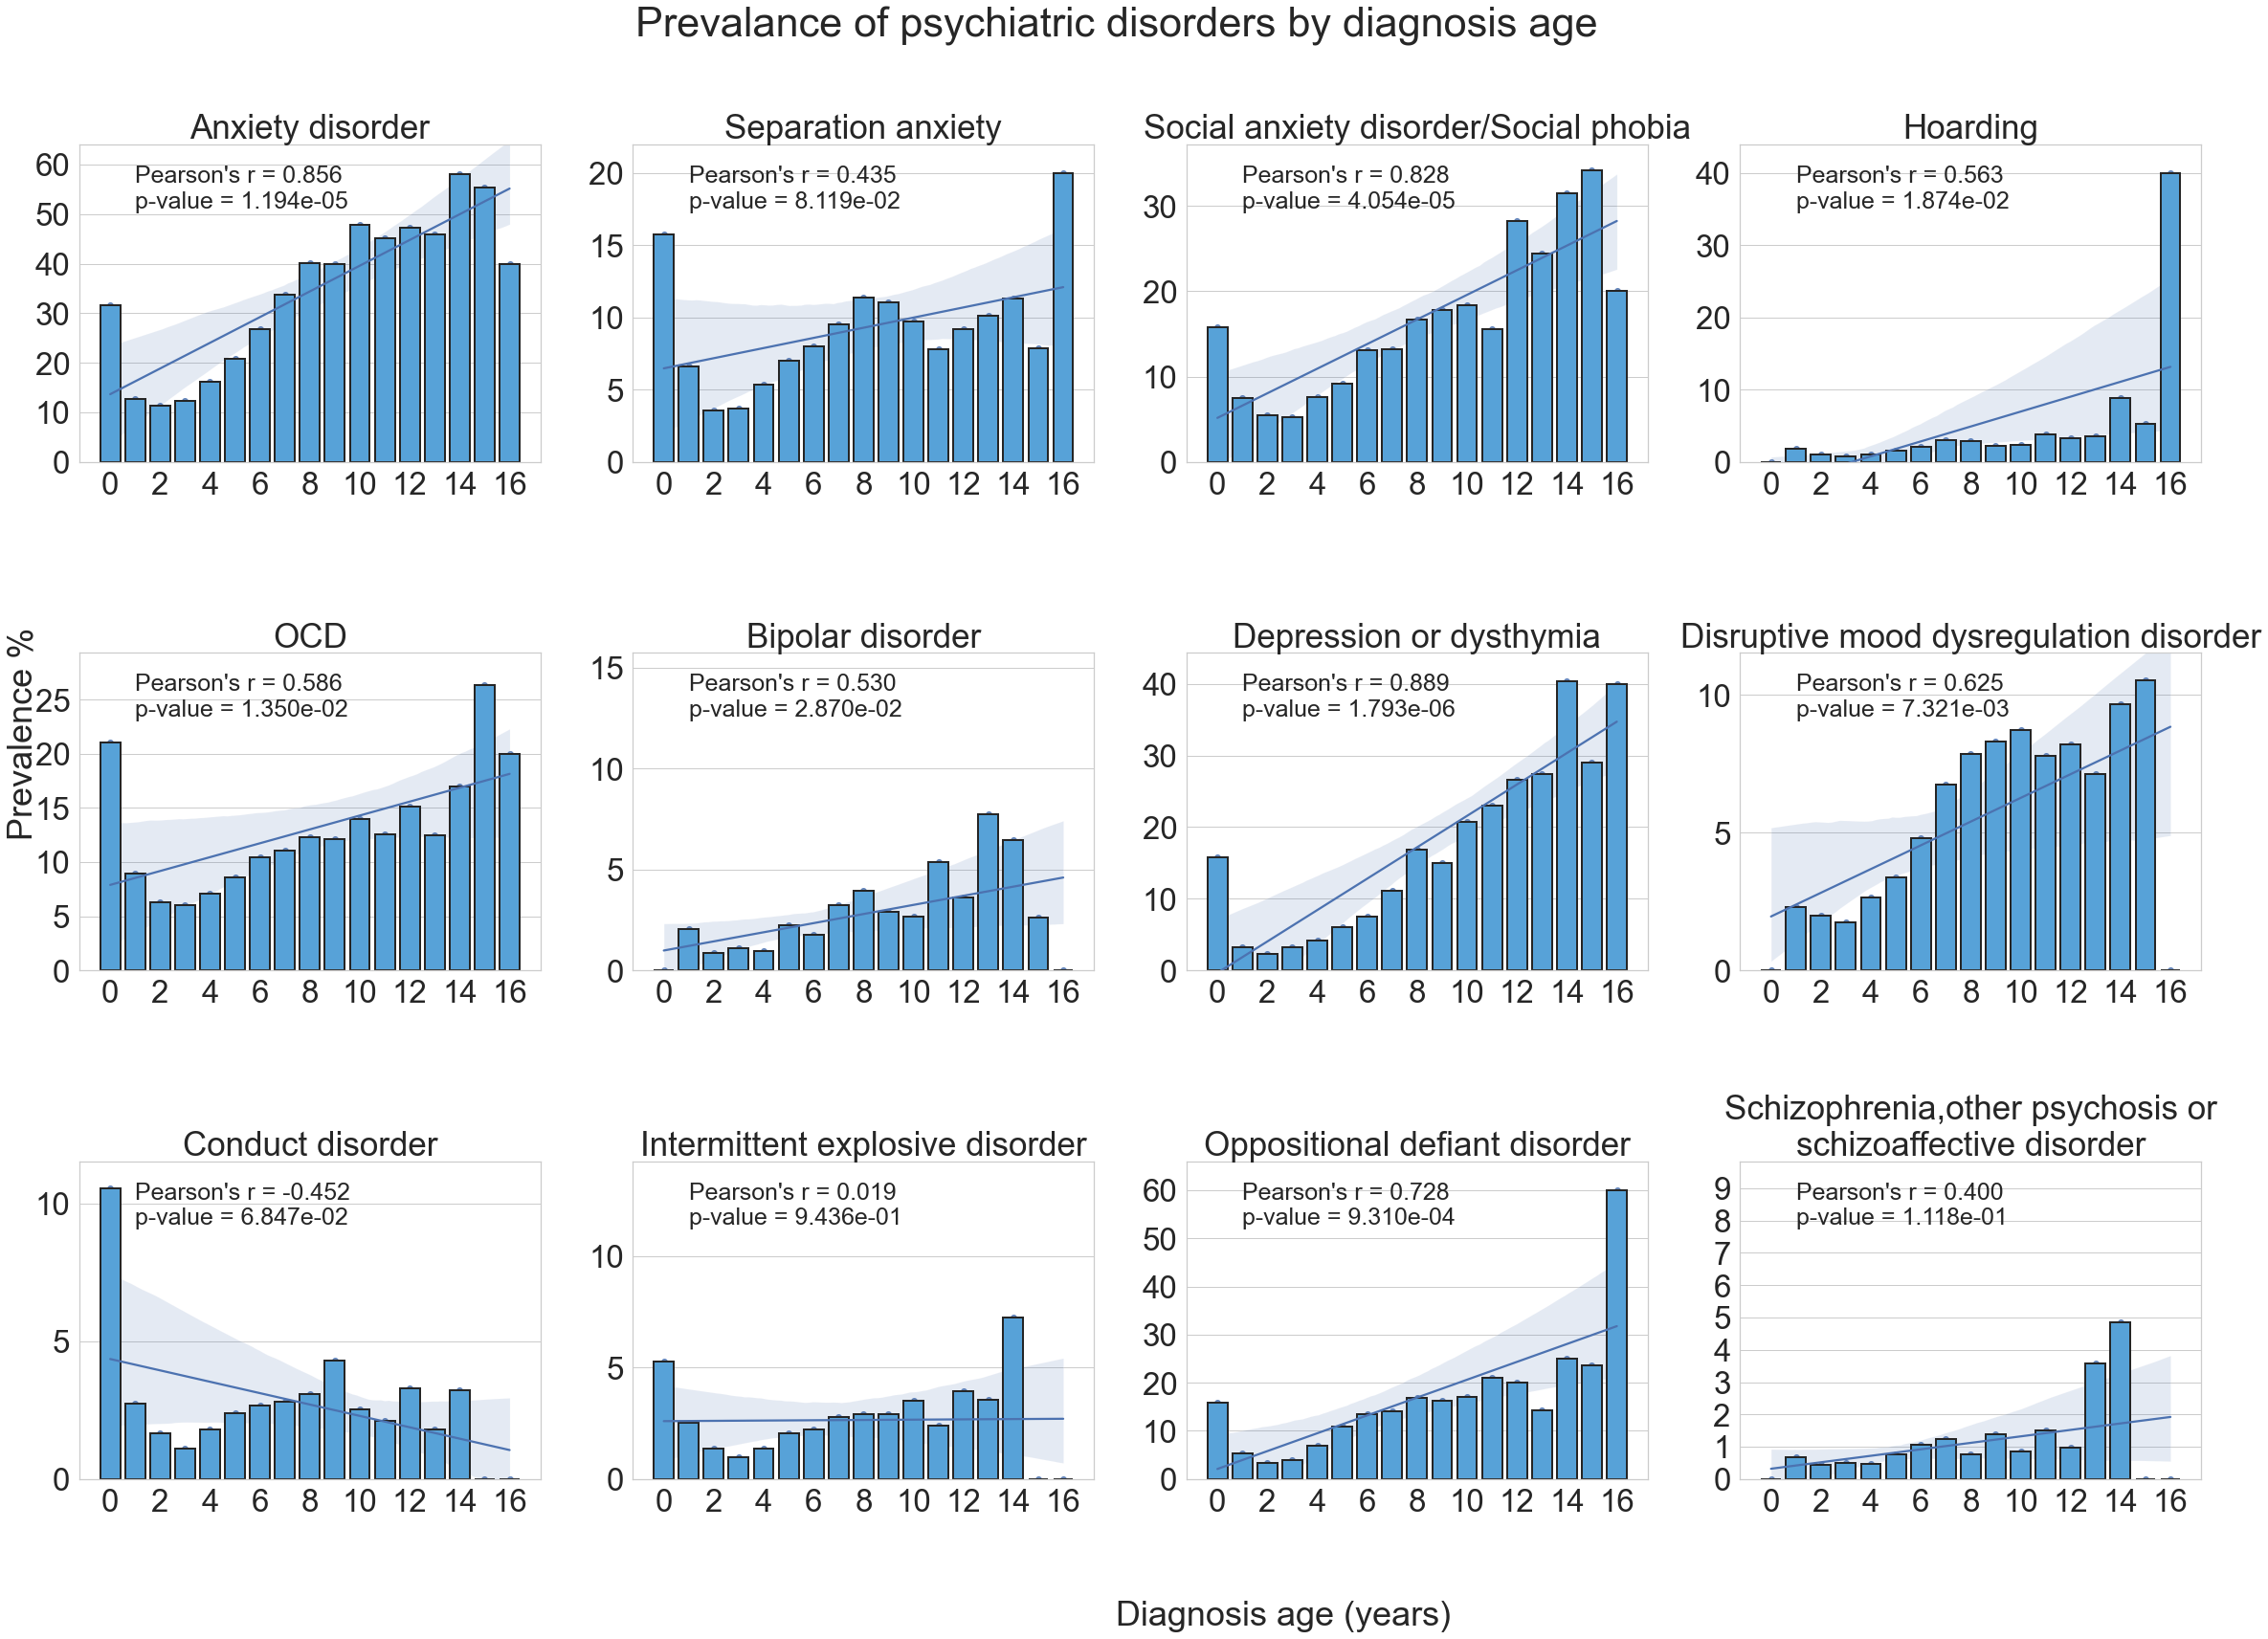

In [9]:
sns.set(style = 'whitegrid', font_scale = 3)

for k,res in analysis_results.items():
    x = res['x']
    y = res['y']
    p = res['p']
    r = res['r']
    ax = fig.add_subplot(3,4,i)
    sns.barplot(ax = ax, x = x, y = y, color = '#41A5EE', edgecolor = '#252525', linewidth = 2)
    sns.regplot(x=x, y=y, ax=ax)
    ax.set_title('\n'+textwrap.fill(k, 40), fontsize = 35)
    ax.set_ylim(0,max(y)+round(0.1*max(y) if max(y)>= 10 else max(y))) 
    ax.set_xticks(np.arange(min(x), max(x)+1, 2))
    r,p = pearsonr(x,y)
    ax.text(x = 1, y = ax.get_ylim()[1] - ax.get_ylim()[1]*0.2, s = f"Pearson's r = {r:.3f}\np-value = {p:.3e}", fontsize = 25)
    ax.yaxis.set_major_locator(MultipleLocator(1 if ax.get_ylim()[1] <=10 else 5 if ax.get_ylim()[1] <=35 else 10))

    i += 1
    
    
fig.text(0.04, 0.5,'Prevalence %', rotation='vertical', fontsize=plt.rcParams['axes.labelsize'])
fig.text( 0.5,0.04,"Diagnosis age (years)", rotation='horizontal', fontsize=plt.rcParams['axes.labelsize'])
fig.suptitle('Prevalance of psychiatric disorders by diagnosis age')
plt.rcParams['figure.figsize'] = (35,25)
plt.subplots_adjust(
left  = 0.07,  # the left side of the subplots of the figure
right = 0.95,    # the right side of the subplots of the figure
bottom = 0.125,   # the bottom of the subplots of the figure
top = 0.9,      # the top of the subplots of the figure
wspace = 0.2,   # the amount of width reserved for blank space between subplots,
hspace = 0.6  # the amount of height reserved for white space between subplots
)
plt.savefig("psych_vs_age.jpeg")
plt.show(fig)

In [10]:
kr = sorted([(k,i['r'], i['p']) for k,i in analysis_results.items()], key=lambda x:x[1], reverse=True)
kr
for i in kr:
    print(f"{i[0]} : (r = {i[1]:.3f}, p = {i[2]:.3f})")

Depression or dysthymia : (r = 0.889, p = 0.000)
Anxiety disorder : (r = 0.856, p = 0.000)
Social anxiety disorder/Social phobia : (r = 0.828, p = 0.000)
Oppositional defiant disorder : (r = 0.728, p = 0.003)
Disruptive mood dysregulation disorder : (r = 0.625, p = 0.018)
OCD : (r = 0.586, p = 0.027)
Hoarding : (r = 0.563, p = 0.032)
Bipolar disorder : (r = 0.530, p = 0.043)
Separation anxiety : (r = 0.435, p = 0.097)
Schizophrenia,other psychosis or schizoaffective disorder : (r = 0.400, p = 0.122)
Intermittent explosive disorder : (r = 0.019, p = 0.944)
Conduct disorder : (r = -0.452, p = 0.091)
